optimized function y values
[0.07276273 0.07506967 0.07748097 0.08000824 0.08265324 0.08542912
 0.08834137 0.09139561 0.09460777 0.0979815  0.10153504 0.10527714
 0.10921677 0.11337649 0.11776321 0.12240306 0.12731013 0.1324991
 0.1380029  0.14383423 0.15003178 0.15661877 0.16361969 0.17108433
 0.17903587 0.18753365 0.19660715 0.20632755 0.21674362 0.22790751
 0.23991373 0.25281629 0.26673011 0.28174032 0.29793862 0.31548044
 0.3344647  0.35508215 0.37748235 0.4018264  0.42837328 0.45729802
 0.48891554 0.52347672 0.56124528 0.60262865 0.64788981 0.69748791
 0.75174795 0.87558596 0.94573244 1.02169042 1.1033515  1.19032645
 1.2821488  1.37752401 1.47498745 1.57213974 1.66592637 1.75300066
 1.82925663 1.8908701  1.93416093 1.95639865 1.95619831 1.93364387
 1.89026918 1.82890732 1.75327749 1.66718493 1.57466841 1.47898738
 1.28931703 1.19903696 1.11350038 1.03314433 0.95841444 0.88918787
 0.82540863 0.76688791 0.71319122 0.6640854  0.57797303 0.54036842
 0.50590262 0.4743535  0.44538488 0

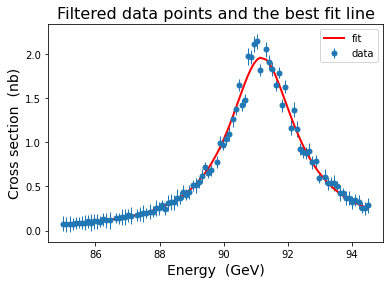

In [3]:
#Augustinas Backis
#2021-12-05


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import scipy. constants as sc

FILE_NAME_1='z_boson_data_1.csv'
FILE_NAME_2='z_boson_data_2.csv'

def import_files(file_1, file_2):
    """
    Imports and combines two data files

    Parameters
    ----------
    file_1 : the first input data file
    file_2 : the second input data file
        Both of files are imported as csv files in this code

    Returns
    -------
    data : array of floats and strings
        Returns a numpy array with outliers and strings

    """
    data_1= np.genfromtxt(file_1, delimiter="," ,comments='%')
    data_2= np.genfromtxt(file_2, delimiter="," ,comments='%')
    data=np.concatenate([data_1, data_2])

    return data

def data_validation(data):
    """
    Dismisses strings in the input dataset

    Parameters
    ----------
    data : numpy array that consists three columns
    Returns
    -------
    stack : vertically stacked individual arrays
        Has the form of: [(float), (float), (float)]
    """
    stack=np.empty((0,3))
    counter_1=0

    for line in data:

        if data[counter_1,0]==float(data[counter_1,0]):
            if data[counter_1,1]==float(data[counter_1,1]):
                if data[counter_1,2]==float(data[counter_1,2]):
                    array_i=[line]
                    stack=np.vstack((stack,array_i))
        counter_1=counter_1+1
    return stack


def data_order (data):
    """
    Reorganises the first column of the dataset
    in the linear order

    Parameters
    ----------
    data : numpy array of three columns

    Returns
    -------
    stack : vertically stacked individual arrays
        Has the form of: [(float), (float), (float)]

    """
    counter_1=0
    x_values=data[0:,0]
    sort=sorted(x_values)
    dataframe=pd.DataFrame(data)
    stack=np.empty((0,3))
    #x values np list
    #df is pd dataframe

    for element in sort:
        count_2=0
        for element in x_values:
            if sort[counter_1] == np.array([dataframe.loc[count_2]])[0,0]:
                line=np.array([dataframe.loc[count_2]])
                stack=np.vstack((stack,line))
            count_2+=1
        counter_1+=1

    return stack


def theoretical_function(energy, m_z, G_z):
    """
    The theoretical funciton that predicts cross section
    values for individual energy quantities. It is later used
    to remove distant outliers

    Parameters
    ----------
    E : array
        An array of the first dataset column
    m_z : float

    G_z : float
    Returns
    -------
    cross_section : array
        Returns an array of expected cross section values
    """
    G_ee=0.08391
    #constant is introduce to simplify the cross_section function
    constant=12*np.pi*G_ee**2/(m_z**2)

    #Converter converts units from GeV to nb
    converter=0.3894*10**6

    cross_section=(energy**2/((energy**2-m_z**2)**2+m_z**2*G_z**2)
                   *constant*converter)

    return cross_section


def fit_function (data):
    """
    Calculates the optimal m_z and G_z values as well as
    the expected cross section quantities after the optimization

    Parameters
    ----------
    data : numpy array with three columns

    Returns
    -------
    fit_line : numpy array
        Indicates the optimal function that best
        describes the datapoints
    popt : popt = [(float), (float)]
        popt indicates the parameters m_z and G_z that
        optimize the fit line
    """
    innitial_guess=[90, 2.5]
    popt, pcov=curve_fit(theoretical_function, data[0:,0], data[0:,1], innitial_guess)

    m_z=popt[0]
    G_z=popt[1]

    G_ee=0.08391
    constant=12*np.pi*G_ee**2/(m_z**2)
    converter=0.3894*10**6
    Energy=data[0:,0]

    fit_line=(Energy**2/((Energy**2-m_z**2)**2+m_z**2*G_z**2)*constant*converter)

    return fit_line, popt



def noise(data, fit_function):
    """
    Removes distant outliers from the dataset

    Parameters
    ----------
    data : numpy array which consists three columns

    fit_function : numpy array
        Fit_function points out the expected cross section
        quantities using the theoretical function and m_z, G_z
        values that previous studies suggest

    Returns
    -------
    stack : vertically stacked individual arrays
        Has the form of: [(float), (float), (float)]

    """
    counter=0
    stack=np.empty((0,3))
    for line in data:

        y_i=line[1]
        function_i=fit_function[counter]
        yerr=line[2]

        if np.absolute(y_i-function_i)<25*yerr:

            stack=np.vstack((stack, line))
        counter+=1

    return stack


def filter_data (fit_function):
    """
    Further minimises the outliers in the dataset
    Uses the optimised fit function to acomplish that

    Parameters
    ----------
    fit_function : numpy array of one column
        Provides the expected cross section values
        for the dataset

    Returns
    -------
    stack : stacked arrays of form [(float)]
        The array indicates the values from the given datasets
        that satisfy all of the filterring criteria provided
        within the code

    """
    counter=0
    stack=np.empty((0,3))
    for line in data:


        y_i=line[1]
        function_i=fit_function[counter]
        yerr=line[2]

        if np.absolute(y_i-function_i)<5*yerr:

            stack=np.vstack((stack, line))
        counter+=1

    return stack




def chi_squared(m_z, G_z):
    """
    Calculates chi-squared and reduced chi-squared of the fit

    Parameters
    ----------
    m_z : float
        Optimized m_z value
    G_z : float
        Optimized

    Returns
    -------
    chi_squared : float

    reduced_chi_squared : float

    """


    prediction=theoretical_function(data[0:,0], m_z, G_z)
    error=data[0:,2]
    observed_value=data[0:,1]

    chi_squared=np.sum(((observed_value - prediction)/error)**2)
    reduced_chi_squared=chi_squared/(len(data[0:,0])-1)


    return chi_squared, reduced_chi_squared


def goodness_of_fit(reduced_chi_squared):
    """
    Describes how good is the fit model

    Parameters
    ----------
    reduced_chi_squared : float

    Returns
    -------
    None.

    """


    if reduced_chi_squared<1.5:
        if reduced_chi_squared>0.8:
            print('the reduced chi-square indicates a very good fit')

    elif reduced_chi_squared<0.2 or reduced_chi_squared>10:
        print(' the reduced chi-square indicates an unreliable fit')
    else:
        print('the reduced chi-squared indicates a moderate fit')


def particle_lifetime(G_z):
    """
    Calculates the lifetime of the particle

    Parameters
    ----------
    G_z : float

    Returns
    -------
    lifetime : float

    """

    unit_converter=1.6*10**-10

    lifetime=sc.hbar/(G_z*unit_converter)


    return lifetime



data=data_validation(import_files(FILE_NAME_1, FILE_NAME_2))

#shows fit line function
#As the previous studies suggested, m_z=90 and G_z=3.
#These values are plugged into the theoretical function
#to find a rough estimate of the best fit line
y_function=theoretical_function(data[0:,0], 90, 3)

#Shows the data without distant outliers

data=noise(data_order(data), y_function)

#Finds the optimized fit function and optimal parameter values

optimized_fit_function, popt = fit_function(data)
m_z, G_z=popt
print('optimized function y values')
print(optimized_fit_function)


#Shows the fully filtered data

data=filter_data(optimized_fit_function)
print('final filtered data')
print(data)


#The following are the calculations of required measurements

m_z, G_z=popt

print('the optimized m_z is: {0:3.2f}'.format(m_z), 'GeV/c^2' )
print('the optimized G_z is: {0:3.2f}'.format(G_z) ,' GeV')
CHI_SQUARED, REDUCED_CHI_SQUARED=chi_squared(m_z, G_z)


print('the minimised chi-squared is: {0:4.2f}'.format(CHI_SQUARED) )
print('the reduced chi-squared is: {0:4.3f}'.format(REDUCED_CHI_SQUARED) )

#indicates how good the fit is

goodness_of_fit(REDUCED_CHI_SQUARED)


LIFETIME=10**12*particle_lifetime(G_z)
print('the lifetime of the particle: {0:15.15f}'.format(LIFETIME) ,' ps')


#Calculates expected cross section values using filtered data

FUNCTION=theoretical_function(data[0:,0], m_z, G_z)


#Creates a txt file consisting the most important information and results

file=open("python results.txt", 'w')

file.write('the filtered dataset')
print('', file=file)
file.write('Energy(GeV), cross section(nb), uncertainty(nb)')
print('', file=file)

for line in data:
    print( '{0:4.2f} {1:4.3f} {2:4.4f}'.format(line[0], line[1], line[2]) , file=file)

print('theoretically expected cross section values for',
           'given energy quantities', file=file)
file.write('')
file.write('cross section(nb)')
print('', file=file)

for element in FUNCTION:
    print('{0:4.3f}'.format(element) , file=file)

print('the optimized m_z is: {0:3.2f}'.format(m_z), 'GeV/c^2', file=file )
print('the optimized G_z is: {0:3.2f}'.format(G_z) ,' GeV' , file=file)
print('the minimised chi-squared is: {0:4.2f}'.format(CHI_SQUARED) , file=file )
print('the reduced chi-squared is: {0:4.3f}'.format(REDUCED_CHI_SQUARED), file=file )
print('the lifetime of the particle: {0:28.27f}'.format(LIFETIME) ,' s', file=file)

file.close()

#Plotting the filtered dataset and the best fit function

x_data=data[0:,0]
y_data=data[0:,1]
uncertainty=data[0:,2]


plt.title('Filtered data points and the best fit line', fontsize=16)
plt.xlabel('Energy  (GeV)', fontsize=14)
plt.ylabel('Cross section  (nb)', fontsize=14)

#filtered dataset

graph=plt.errorbar(x_data,y_data, yerr=uncertainty, linewidth=1,
                    fmt='o',markersize='5', label='data' )

#fit line

fit_line=plt.plot(x_data, FUNCTION,
                  label='fit', linewidth=2, color='r')

#shows the legend, saves figure and shows the plots

plt.legend()

plt.savefig('Filtered_experimental_data.png', dpi=350, bbox_inches='tight')

plt.show(graph, fit_line)
